# Replicaci√≥n Art√≠culo: Forecasting Short Term Photovoltaic Power Model Based on Improved Snake Optimization, Convolutional Neural Network and Bidirectional Long Short-Term Memory Network

In [1]:
import warnings
warnings.filterwarnings("ignore")

Leemos los datos

In [2]:
import pandas as pd
datos = pd.read_excel("02.Generaci√≥n Pearson.xlsx")
datos["Generacion_prev_hour"] = datos["Generaci√≥n"].shift(1)
datos = datos.dropna(how="any", axis= 0)
datos.index = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M:%s')
datos = datos.drop(columns='Fecha', axis=1)
datos.head(4)

Generaci√≥n  √çndice UV  Temperatura  Hora  DPT  \
Fecha                                                                
2022-09-01 01:00:00         0.0        0.0           19     1   16   
2022-09-01 02:00:00         0.0        0.0           18     2   16   
2022-09-01 03:00:00         0.0        0.0           18     3   16   
2022-09-01 04:00:00         0.0        0.0           18     4   16   

                     Cobertura Nubes  Condici√≥n Cielo  Humedad Relativa  \
Fecha                                                                     
2022-09-01 01:00:00               82                4                82   
2022-09-01 02:00:00               73                3                85   
2022-09-01 03:00:00               63                3                87   
2022-09-01 04:00:00               70                3                88   

                     Generacion_prev_hour  
Fecha                                      
2022-09-01 01:00:00                   0.0  
2022-09-01 02:00:00                   0.0  
2022-09-01 03:00:00                   0.0  
2022-09-01 04:00:00                   0.0

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18289 entries, 2022-09-01 01:00:00 to 2024-10-03 00:00:00
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Generaci√≥n            18289 non-null  float64
 1   √çndice UV             18289 non-null  float64
 2   Temperatura           18289 non-null  int64  
 3   Hora                  18289 non-null  int64  
 4   DPT                   18289 non-null  int64  
 5   Cobertura Nubes       18289 non-null  int64  
 6   Condici√≥n Cielo       18289 non-null  int64  
 7   Humedad Relativa      18289 non-null  int64  
 8   Generacion_prev_hour  18289 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


In [4]:
datos.describe().T

count         mean           std  min   25%    50%  \
Generaci√≥n            18289.0  9392.983969  11398.764291  0.0   0.0  533.0   
√çndice UV             18289.0     1.976418      3.181404  0.0   0.0    0.0   
Temperatura           18289.0    19.456723      6.636719  0.0  15.0   19.0   
Hora                  18289.0    12.500683      6.922804  1.0   7.0   13.0   
DPT                   18289.0     9.837881      4.803705  0.0   6.0   10.0   
Cobertura Nubes       18289.0    50.305594     37.864498  0.0  12.0   48.0   
Condici√≥n Cielo       18289.0     2.675816      1.493514  1.0   1.0    3.0   
Humedad Relativa      18289.0    58.878233     26.112575  3.0  37.0   62.0   
Generacion_prev_hour  18289.0  9392.983969  11398.764291  0.0   0.0  533.0   

                          75%      max  
Generaci√≥n            21830.0  30000.0  
√çndice UV                 3.0     14.0  
Temperatura              24.0     39.0  
Hora                     19.0     25.0  
DPT                      14.0     20.0  
Cobertura Nubes          92.0    100.0  
Condici√≥n Cielo           4.0      5.0  
Humedad Relativa         83.0    100.0  
Generacion_prev_hour  21830.0  30000.0

Divisi√≥n de datos en Soleado, nublado y lluvioso

In [5]:
datos.columns

Index(['Generaci√≥n', '√çndice UV', 'Temperatura', 'Hora', 'DPT',
       'Cobertura Nubes', 'Condici√≥n Cielo', 'Humedad Relativa',
       'Generacion_prev_hour'],
      dtype='object')

In [6]:
datosX = datos[['√çndice UV', 'Temperatura', 'Hora', 'DPT',
       'Cobertura Nubes', 'Condici√≥n Cielo', 'Humedad Relativa',
       'Generacion_prev_hour']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datosX)

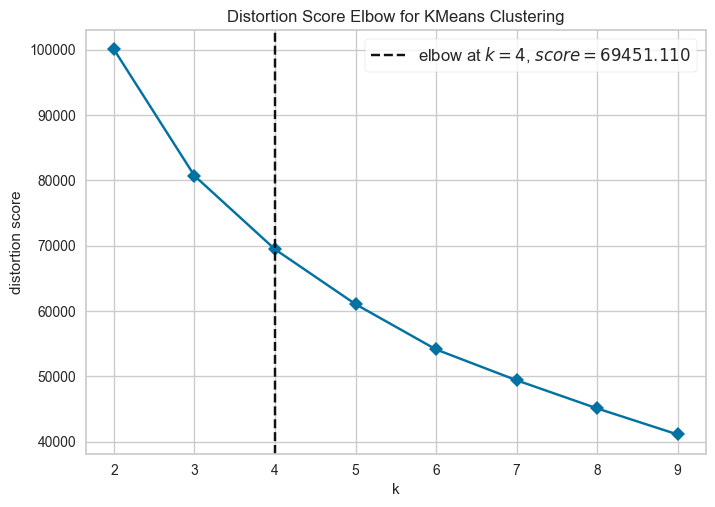

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Determinar el n√∫mero √≥ptimo de clusters usando el m√©todo del codo
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(X_scaled)
visualizer.show()

In [9]:
# Elegimos el mejor n√∫mero de clusters basado en la gr√°fica del codo
K_optimo = visualizer.elbow_value_
K_optimo

np.int64(4)

In [10]:
# Aplicar K-Means con el n√∫mero √≥ptimo de clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [11]:
datos['Cluster'] = clusters
datos

Generaci√≥n  √çndice UV  Temperatura  Hora  DPT  \
Fecha                                                                
2022-09-01 01:00:00         0.0        0.0           19     1   16   
2022-09-01 02:00:00         0.0        0.0           18     2   16   
2022-09-01 03:00:00         0.0        0.0           18     3   16   
2022-09-01 04:00:00         0.0        0.0           18     4   16   
2022-09-01 05:00:00         0.0        0.0           17     5   14   
...                         ...        ...          ...   ...  ...   
2024-10-02 20:00:00         0.0        0.0           22    20    9   
2024-10-02 21:00:00         0.0        0.0           20    21   10   
2024-10-02 22:00:00         0.0        0.0           18    22   11   
2024-10-02 23:00:00         0.0        0.0           17    23   11   
2024-10-03 00:00:00         0.0        0.0           16    24   11   

                     Cobertura Nubes  Condici√≥n Cielo  Humedad Relativa  \
Fecha                                                                     
2022-09-01 01:00:00               82                4                82   
2022-09-01 02:00:00               73                3                85   
2022-09-01 03:00:00               63                3                87   
2022-09-01 04:00:00               70                3                88   
2022-09-01 05:00:00               45                3                86   
...                              ...              ...               ...   
2024-10-02 20:00:00                2                1                45   
2024-10-02 21:00:00                1                1                54   
2024-10-02 22:00:00                0                1                62   
2024-10-02 23:00:00                0                1                69   
2024-10-03 00:00:00                0                1                73   

                     Generacion_prev_hour  Cluster  
Fecha                                               
2022-09-01 01:00:00                   0.0        3  
2022-09-01 02:00:00                   0.0        3  
2022-09-01 03:00:00                   0.0        3  
2022-09-01 04:00:00                   0.0        3  
2022-09-01 05:00:00                   0.0        3  
...                                   ...      ...  
2024-10-02 20:00:00                1450.0        0  
2024-10-02 21:00:00                   0.0        0  
2024-10-02 22:00:00                   0.0        0  
2024-10-02 23:00:00                   0.0        0  
2024-10-03 00:00:00                   0.0        0  

[18289 rows x 10 columns]

In [12]:
print(datos['Cluster'].value_counts())
# Calcular estad√≠sticas de cada cluster
cluster_means = datos.groupby('Cluster').mean()
cluster_means


Cluster
2    4778
3    4722
0    4554
1    4235
Name: count, dtype: int64


Generaci√≥n  √çndice UV  Temperatura       Hora        DPT  \
Cluster                                                               
0         3208.819993   0.523518    16.774923  12.077295   9.688845   
1         8180.778603   1.119835    20.248406  18.490437  10.364817   
2        22885.030243   5.754835    26.519674  14.665969   7.940561   
3         2792.258718   0.322639    14.186362   5.346040  11.428844   

         Cobertura Nubes  Condici√≥n Cielo  Humedad Relativa  \
Cluster                                                       
0              11.037330         1.170400         64.265261   
1              82.131759         3.973554         55.802125   
2              28.739640         1.707828         31.594391   
3              81.454680         3.943244         84.049132   

         Generacion_prev_hour  
Cluster                        
0                 2052.067032  
1                 9605.164827  
2                24387.580048  
3                 1110.004241

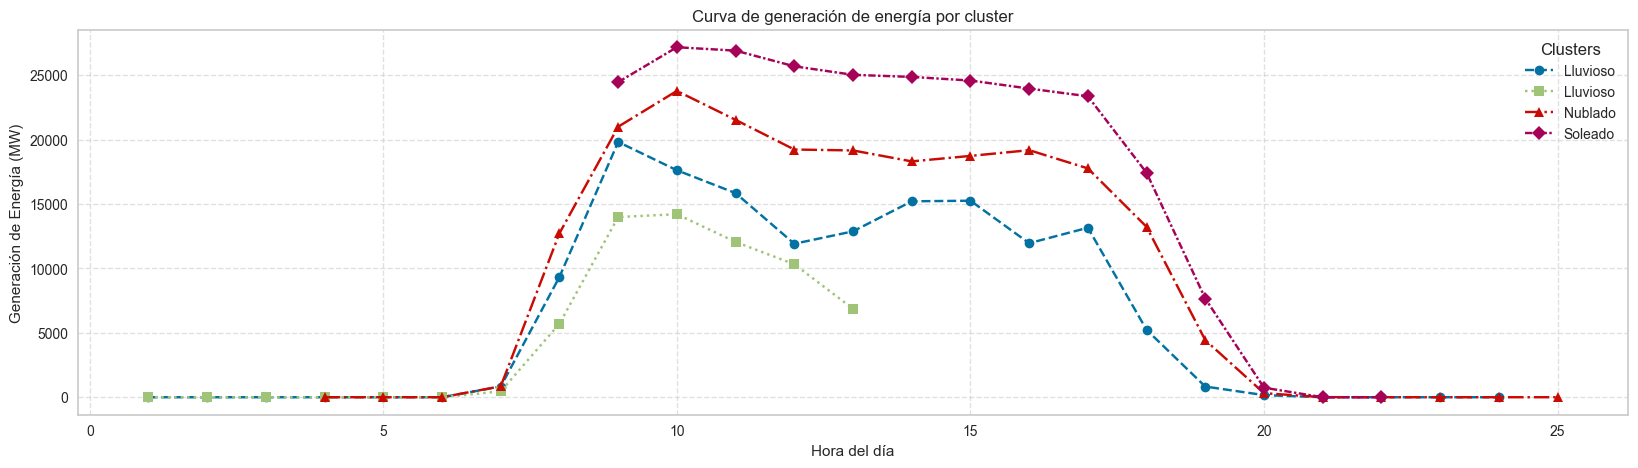

In [13]:
import matplotlib.pyplot as plt
df_grouped = datos.groupby(['Hora', 'Cluster'])['Generaci√≥n'].mean().reset_index()

plt.figure(figsize=(20,5))

clusters = df_grouped['Cluster'].unique()

# Definir estilos para cada cluster
line_styles = ['dashed', 'dotted', 'dashdot', (0, (3, 1, 1, 1)), (0, (5, 1))]
markers = ['o', 's', '^', 'D', 'x']

# Dibujar una l√≠nea para cada cluster
for i, cluster in enumerate(clusters):
    if cluster == 0:
        label = 'Lluvioso'
    if cluster == 1:
        label = 'Nublado'
    if cluster == 2:
        label = 'Soleado'
    subset = df_grouped[df_grouped['Cluster'] == cluster]
    plt.plot(subset['Hora'], subset['Generaci√≥n'], 
             linestyle=line_styles[i % len(line_styles)], 
             marker=markers[i % len(markers)], 
             label=label)

# Configuraci√≥n de la gr√°fica
plt.xlabel("Hora del d√≠a")
plt.ylabel("Generaci√≥n de Energ√≠a (MW)")
plt.title("Curva de generaci√≥n de energ√≠a por cluster")
plt.legend(title="Clusters")
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar la gr√°fica
plt.show()

Como el art√≠culo no menciona el porcentaje de entrenamiento, usaremos 70-15-15.

Tomemos en cuenta que: cluster == 0: 'Lluvioso', cluster == 1: 'Nublado', cluster == 2: 'Soleado'

In [14]:
import numpy as np
def datos_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

Divisi√≥n en x y y.

El art√≠culo tampoco menciona la ventana de tiempo que usaron, as√≠ que pondremos 5 como default

In [15]:
WINDOW_SIZE = 10
X_Soleado, y_Soleado = datos_to_X_y(datos[datos['Cluster']==2].drop(columns='Cluster', axis=1), WINDOW_SIZE)
X_Nublado, y_Nublado = datos_to_X_y(datos[datos['Cluster']==1].drop(columns='Cluster', axis=1), WINDOW_SIZE)
X_Lluvioso, y_Lluvioso = datos_to_X_y(datos[datos['Cluster']==0].drop(columns='Cluster', axis=1), WINDOW_SIZE)
X_Soleado.shape, y_Soleado.shape, X_Nublado.shape, y_Nublado.shape, X_Lluvioso.shape, y_Lluvioso.shape

((4768, 10, 9), (4768,), (4225, 10, 9), (4225,), (4544, 10, 9), (4544,))

C√°lculos para el 70-15-15

In [16]:
num_datos_Soleado = X_Soleado.shape[0]
train_Soleado = int(round(num_datos_Soleado * 0.7,0))
val_Soleado = int(train_Soleado + round((num_datos_Soleado - train_Soleado) / 2, 0))

num_datos_Nublado = X_Nublado.shape[0]
train_Nublado = int(round(num_datos_Nublado * 0.7,0))
val_Nublado = int(train_Nublado + round((num_datos_Nublado - train_Nublado) / 2, 0))

num_datos_Lluvioso = X_Lluvioso.shape[0]
train_Lluvioso = int(round(num_datos_Lluvioso * 0.7,0))
val_Lluvioso = int(train_Lluvioso + round((num_datos_Lluvioso - train_Lluvioso) / 2, 0))

num_datos_Soleado, train_Soleado, val_Soleado, num_datos_Nublado, train_Nublado, val_Nublado, num_datos_Lluvioso, train_Lluvioso, val_Lluvioso

(4768, 3338, 4053, 4225, 2958, 3592, 4544, 3181, 3863)

Divisi√≥n entrenamiento, validaci√≥n y prueba


In [17]:
X_Soleado_train, y_Soleado_train = X_Soleado[:train_Soleado], y_Soleado[:train_Soleado]
X_Soleado_val, y_Soleado_val = X_Soleado[train_Soleado:val_Soleado], y_Soleado[train_Soleado:val_Soleado]
X_Soleado_test, y_Soleado_test = X_Soleado[val_Soleado:], y_Soleado[val_Soleado:]
X_Soleado_train.shape, y_Soleado_train.shape, X_Soleado_val.shape, y_Soleado_val.shape, X_Soleado_test.shape, y_Soleado_test.shape

((3338, 10, 9), (3338,), (715, 10, 9), (715,), (715, 10, 9), (715,))

In [18]:
X_Nublado_train, y_Nublado_train = X_Nublado[:train_Nublado], y_Nublado[:train_Nublado]
X_Nublado_val, y_Nublado_val = X_Nublado[train_Nublado:val_Nublado], y_Nublado[train_Nublado:val_Nublado]
X_Nublado_test, y_Nublado_test = X_Nublado[val_Nublado:], y_Nublado[val_Nublado:]
X_Nublado_train.shape, y_Nublado_train.shape, X_Nublado_val.shape, y_Nublado_val.shape, X_Nublado_test.shape, y_Nublado_test.shape

((2958, 10, 9), (2958,), (634, 10, 9), (634,), (633, 10, 9), (633,))

In [19]:
X_Lluvioso_train, y_Lluvioso_train = X_Lluvioso[:train_Lluvioso], y_Lluvioso[:train_Lluvioso]
X_Lluvioso_val, y_Lluvioso_val = X_Lluvioso[train_Lluvioso:val_Lluvioso], y_Lluvioso[train_Lluvioso:val_Lluvioso]
X_Lluvioso_test, y_Lluvioso_test = X_Lluvioso[val_Lluvioso:], y_Lluvioso[val_Lluvioso:]
X_Lluvioso_train.shape, y_Lluvioso_train.shape, X_Lluvioso_val.shape, y_Lluvioso_val.shape, X_Lluvioso_test.shape, y_Lluvioso_test.shape

((3181, 10, 9), (3181,), (682, 10, 9), (682,), (681, 10, 9), (681,))

Definici√≥n del modelo

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [21]:
features = X_Soleado_train.shape[0]

In [406]:
model_Soleado = Sequential()
model_Soleado.add(InputLayer((WINDOW_SIZE, 9)))

#CNN
model_Soleado.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_Soleado.add(BatchNormalization())  # üîπ Nueva Normalizaci√≥n aqu√≠
model_Soleado.add(MaxPooling1D(pool_size=2))

#model_Soleado.add(Flatten())
#BiLSTM
model_Soleado.add(Bidirectional(LSTM(128, return_sequences=True)))
model_Soleado.add(Bidirectional(LSTM(64, return_sequences=True)))
model_Soleado.add(Dropout(0.2))  # üîπ Mayor regularizaci√≥n en BiLSTM
model_Soleado.add(Bidirectional(LSTM(32, return_sequences=False)))

#Normalizaci√≥n y Dropout
model_Soleado.add(BatchNormalization())
model_Soleado.add(Dropout(0.3))

# Capas Densas
model_Soleado.add(Dense(16, activation='relu'))
model_Soleado.add(Dense(1, 'relu'))

model_Soleado.summary()

Model: "sequential_33"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d_36 (Conv1D)              ‚îÇ (None, 10, 64)         ‚îÇ         1,216 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_29          ‚îÇ (None, 10, 64)         ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_33 (MaxPooling1D) ‚îÇ (None, 5, 64)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_64                ‚îÇ (None, 5, 256)         ‚îÇ       197,632 ‚îÇ
‚îÇ (Bidirectional)                 ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_65                ‚îÇ (None, 5, 128)         ‚îÇ       164,352 ‚îÇ
‚îÇ (Bidirectional)                 ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_26 (Dropout)            ‚îÇ (None, 5, 128)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_66                ‚îÇ (None, 64)             ‚îÇ        41,216 ‚îÇ
‚îÇ (Bidirectional)                 ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_30          ‚îÇ (None, 64)             ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_27 (Dropout)            ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_54 (Dense)                ‚îÇ (None, 16)             ‚îÇ         1,040 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 405,985 (1.55 MB)

 Trainable params: 405,729 (1.55 MB)

 Non-trainable params: 256 (1.00 KB)

In [24]:
from tensorflow.keras.losses import Huber

In [408]:
cp = ModelCheckpoint('Forcasting_model_Soleado.keras', save_best_only=True)
model_Soleado.compile(optimizer=Adam(learning_rate=0.0001), loss=Huber(delta=1000), metrics=['mae'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [369]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_Soleado_train = scaler_X.fit_transform(X_Soleado_train.reshape(-1, X_Soleado_train.shape[-1])).reshape(X_Soleado_train.shape)
X_Soleado_val = scaler_X.transform(X_Soleado_val.reshape(-1, X_Soleado_val.shape[-1])).reshape(X_Soleado_val.shape)
X_Soleado_test = scaler_X.transform(X_Soleado_test.reshape(-1, X_Soleado_test.shape[-1])).reshape(X_Soleado_test.shape)

y_Soleado_train = scaler_y.fit_transform(y_Soleado_train.reshape(-1, 1)).reshape(-1)
y_Soleado_val = scaler_y.transform(y_Soleado_val.reshape(-1, 1)).reshape(-1)
y_Soleado_test = scaler_y.transform(y_Soleado_test.reshape(-1, 1)).reshape(-1)


In [370]:
X_Soleado_train.shape, y_Soleado_train.shape, X_Soleado_val.shape, y_Soleado_val.shape, X_Soleado_test.shape, y_Soleado_test.shape

((4093, 10, 9), (4093,), (877, 10, 9), (877,), (877, 10, 9), (877,))

In [371]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)


In [412]:
history = model_Soleado.fit(X_Soleado_train, y_Soleado_train, validation_data=(X_Soleado_val, y_Soleado_val), epochs=100, batch_size=8, callbacks=[cp, early_stop])

Epoch 1/100
512/512 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 36ms/step - loss: 0.0115 - mae: 0.1114 - val_loss: 0.0128 - val_mae: 0.0933
Epoch 2/100
512/512 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 39ms/step - loss: 0.0117 - mae: 0.1102 - val_loss: 0.0167 - val_mae: 0.1039
Epoch 3/100
512/512 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 41ms/step - loss: 0.0118 - mae: 0.1103 - val_loss: 0.0116 - val_mae: 0.0876
Epoch 4/100
512/512 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 39ms/step - loss: 0.0108 - mae: 0.1060 - val_loss: 0.0118 - val_mae: 0.0901
Epoch 5/100
512/512 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 44ms/step - loss: 0.0108 - mae: 0.1050 - val_loss: 0.0124 - val_mae: 0.0912
Epoch 6/100
512/512 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 36ms/step - loss: 0.0100 - mae: 0.1017 - val_loss: 0.0145 - val_mae: 0.0965
Epoch 7/100
512/512 ‚îÅ‚îÅ‚îÅ‚îÅ‚î

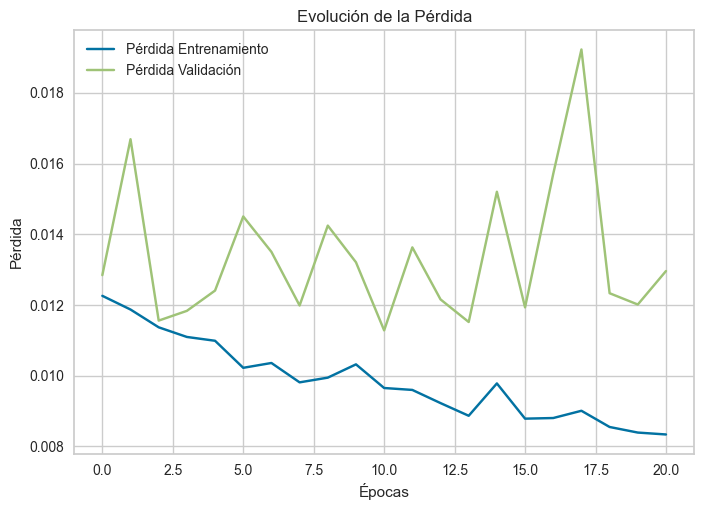

In [413]:
import matplotlib.pyplot as plt

# Extraer la p√©rdida del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear la gr√°fica
plt.plot(train_loss, label='P√©rdida Entrenamiento')
plt.plot(val_loss, label='P√©rdida Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.title('Evoluci√≥n de la P√©rdida')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_percentage_error as mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mean_absolute_error
from sklearn.metrics import mean_squared_error as mean_squared_error
from sklearn.metrics import r2_score as r2_score
def plot_predictions1(model, X, y, scaler_y, start=0, end=100):
    predictions = model.predict(X).flatten()
    y = y.flatten()
    predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(-1)
    predictions_original = np.clip(predictions_original, 0, 30000)
    y_original = scaler_y.inverse_transform(y.reshape(-1, 1)).reshape(-1)
    df = pd.DataFrame(data={'Predictions': predictions_original, 'Actuals': y_original})
    plt.figure(figsize=(20, 5))
    print(f"MAE: {mean_absolute_error(y_original, predictions_original):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_original, predictions_original)):.4f}")
    print(f"R¬≤: {r2_score(y_original, predictions_original):.4f}")
    plt.plot(y_original, label='Valor Real', color='blue')
    plt.plot(predictions_original, label='Predicci√≥n', color='red', linestyle='dashed')
    plt.xlabel("Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    return df

28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step
MAE: 2509.9100
RMSE: 3880.8193
R¬≤: 0.6634


Predictions  Actuals
0    25759.826172  22788.0
1    26190.437500  29354.0
2    28042.835938  29193.0
3    28315.199219  29220.0
4    28874.947266  28971.0
..            ...      ...
872  24108.628906  25399.0
873  25231.251953  25562.0
874  25649.718750  25386.0
875  24499.578125  22872.0
876  14291.562500  15825.0

[877 rows x 2 columns]

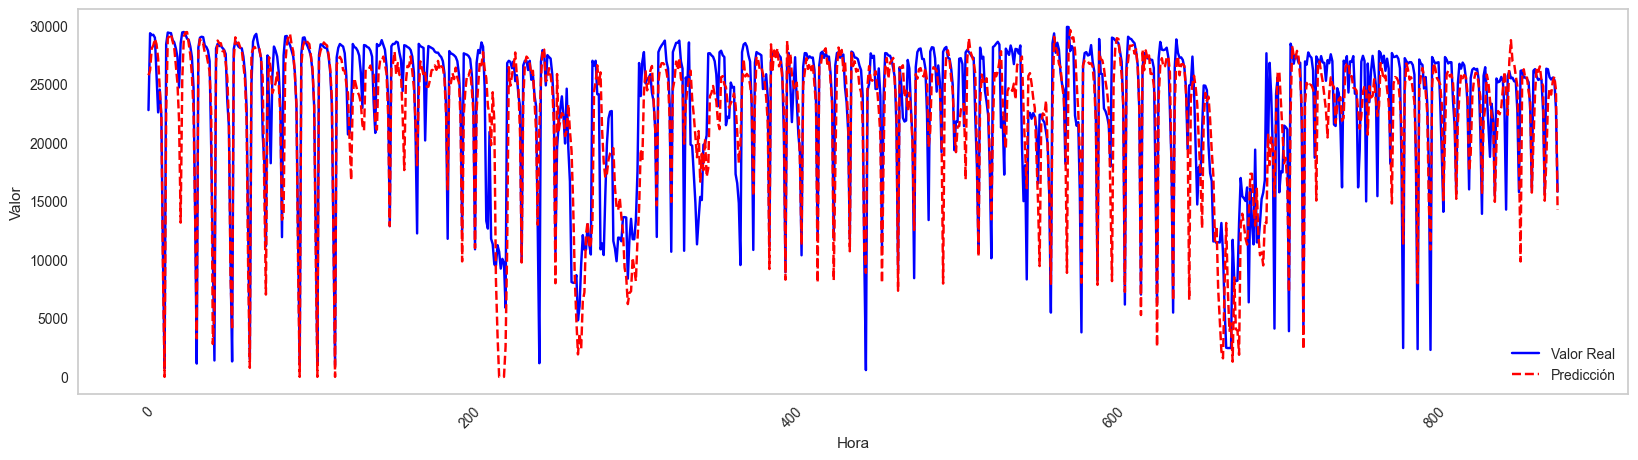

In [415]:
plot_predictions1(model_Soleado, X_Soleado_test, y_Soleado_test, scaler_y_Soleado)

Nublado

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_Nublado_X = MinMaxScaler()
scaler_Nublado_y = MinMaxScaler()

X_Nublado_train = scaler_Nublado_X.fit_transform(X_Nublado_train.reshape(-1, X_Nublado_train.shape[-1])).reshape(X_Nublado_train.shape)
X_Nublado_val = scaler_Nublado_X.transform(X_Nublado_val.reshape(-1, X_Nublado_val.shape[-1])).reshape(X_Nublado_val.shape)
X_Nublado_test = scaler_Nublado_X.transform(X_Nublado_test.reshape(-1, X_Nublado_test.shape[-1])).reshape(X_Nublado_test.shape)

y_Nublado_train = scaler_Nublado_y.fit_transform(y_Nublado_train.reshape(-1, 1)).reshape(-1)
y_Nublado_val = scaler_Nublado_y.transform(y_Nublado_val.reshape(-1, 1)).reshape(-1)
y_Nublado_test = scaler_Nublado_y.transform(y_Nublado_test.reshape(-1, 1)).reshape(-1)

In [44]:
model_Nublado = Sequential()
model_Nublado.add(InputLayer((WINDOW_SIZE, 9)))

#CNN
model_Nublado.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_Nublado.add(BatchNormalization())
model_Nublado.add(MaxPooling1D(pool_size=2))

#model_Nublado.add(Flatten())
#BiLSTM
model_Nublado.add(Bidirectional(LSTM(128, return_sequences=True)))
model_Nublado.add(Bidirectional(LSTM(64, return_sequences=True)))
model_Nublado.add(Dropout(0.2))
model_Nublado.add(Bidirectional(LSTM(32, return_sequences=False)))

#Normalizaci√≥n y Dropout
model_Nublado.add(Dropout(0.1))

model_Nublado.add(Dense(16, 'relu'))
model_Nublado.add(Dense(1, 'linear'))

model_Nublado.summary()

Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d_2 (Conv1D)               ‚îÇ (None, 10, 64)         ‚îÇ         1,216 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_4           ‚îÇ (None, 10, 64)         ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_2 (MaxPooling1D)  ‚îÇ (None, 5, 64)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_6 (Bidirectional) ‚îÇ (None, 5, 256)         ‚îÇ       197,632 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_7 (Bidirectional) ‚îÇ (None, 5, 128)         ‚îÇ       164,352 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 5, 128)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_8 (Bidirectional) ‚îÇ (None, 64)             ‚îÇ        41,216 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 16)             ‚îÇ         1,040 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 405,729 (1.55 MB)

 Trainable params: 405,601 (1.55 MB)

 Non-trainable params: 128 (512.00 B)

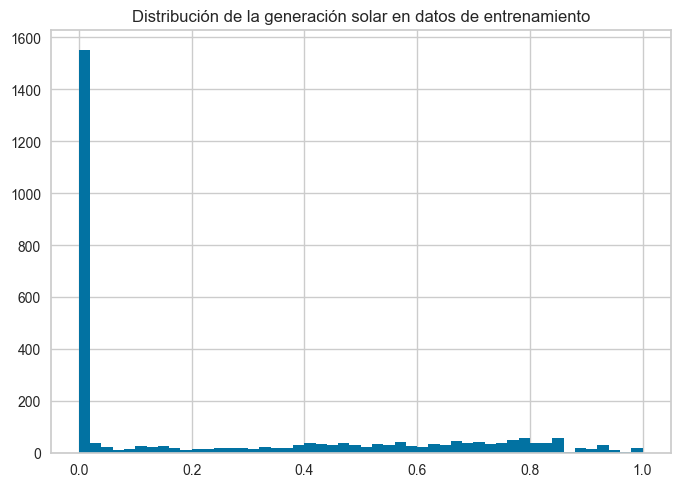

In [45]:
import matplotlib.pyplot as plt
plt.hist(y_Nublado_train, bins=50)
plt.title("Distribuci√≥n de la generaci√≥n solar en datos de entrenamiento")
plt.show()

In [46]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplanar X para que tenga solo 2 dimensiones
X_train_flat = X_Nublado_train.reshape(X_Nublado_train.shape[0], -1)  # (samples, timesteps * features)

# Crear rangos para la generaci√≥n solar (por ejemplo, 5 categor√≠as)
bins = np.linspace(y_Nublado_train.min(), y_Nublado_train.max(), 6)  # 6 intervalos
y_train_binned = np.digitize(y_Nublado_train, bins)  # Convertir y en categor√≠as

# Aplicar SMOTE en los datos aplanados
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_flat, y_train_resampled_binned = smote.fit_resample(X_train_flat, y_train_binned)

# Convertir de nuevo los valores categorizados a valores continuos
y_train_resampled = bins[y_train_resampled_binned - 1]  # Asignar el valor del bin original

# Restaurar la forma original de X (desaplanar)
X_train_resampled = X_train_resampled_flat.reshape(-1, X_Nublado_train.shape[1], X_Nublado_train.shape[2])  # (samples, timesteps, features)


In [58]:
import tensorflow as tf
def weighted_mse(y_true, y_pred):
    weights = tf.where(y_true == 0, 3.0, 1.0)  # Mayor peso en valores cercanos a 0
    return tf.reduce_mean(weights * tf.square(y_true - y_pred))

In [63]:
cp2 = ModelCheckpoint('Forcasting_model_Nublado.keras', save_best_only=True)
model_Nublado.compile(optimizer=Adam(learning_rate=0.0001), loss=Huber(delta=1000), metrics=['mae'])

In [52]:
X_train_resampled.shape, y_train_resampled.shape, X_Nublado_val.shape, y_Nublado_val.shape, X_Nublado_test.shape, y_Nublado_test.shape

((10530, 10, 9), (10530,), (634, 10, 9), (634,), (633, 10, 9), (633,))

In [64]:
history2 = model_Nublado.fit(X_train_resampled, y_train_resampled, validation_data=(X_Nublado_val, y_Nublado_val), epochs=100, batch_size=16, callbacks=[cp2, early_stop])

Epoch 1/100
659/659 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 21ms/step - loss: 0.0114 - mae: 0.1078 - val_loss: 0.0341 - val_mae: 0.1717
Epoch 2/100
659/659 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 19ms/step - loss: 0.0096 - mae: 0.0991 - val_loss: 0.0358 - val_mae: 0.1788
Epoch 3/100
659/659 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 20ms/step - loss: 0.0095 - mae: 0.0982 - val_loss: 0.0330 - val_mae: 0.1755
Epoch 4/100
659/659 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 19ms/step - loss: 0.0088 - mae: 0.0934 - val_loss: 0.0333 - val_mae: 0.1767
Epoch 5/100
659/659 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 20ms/step - loss: 0.0081 - mae: 0.0903 - val_loss: 0.0361 - val_mae: 0.1785
Epoch 6/100
659/659 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 19ms/step - loss: 0.0080 - mae: 0.0894 - val_loss: 0.0341 - val_mae: 0.1726
Epoch 7/100
659/659 ‚îÅ‚îÅ‚îÅ‚îÅ‚î

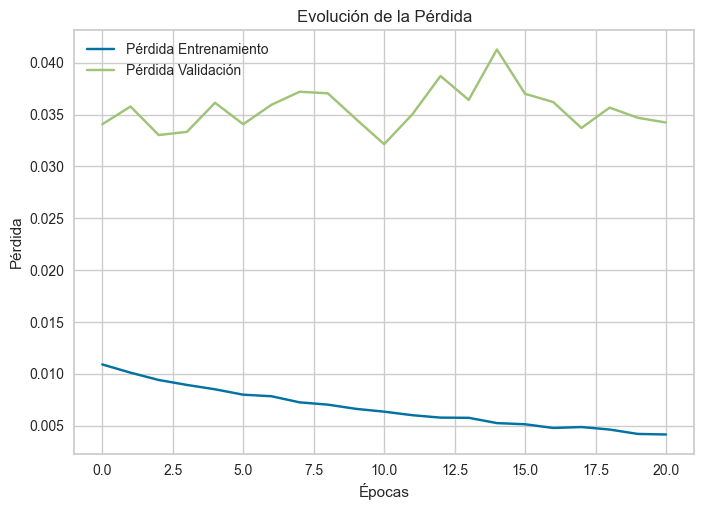

In [65]:
import matplotlib.pyplot as plt

# Extraer la p√©rdida del historial
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Crear la gr√°fica
plt.plot(train_loss, label='P√©rdida Entrenamiento')
plt.plot(val_loss, label='P√©rdida Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.title('Evoluci√≥n de la P√©rdida')
plt.legend()
plt.grid(True)
plt.show()


20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 52ms/step
MAE: 4871.2475
RMSE: 7253.8253
R¬≤: 0.5671


Predictions  Actuals
0    19061.876953  19933.0
1    15566.901367   8624.0
2     2976.493408    357.0
3      916.727539      0.0
4        0.000000      0.0
..            ...      ...
628      0.000000      0.0
629      0.000000      0.0
630    795.479126      0.0
631   6214.223633  23339.0
632  13010.339844  26323.0

[633 rows x 2 columns]

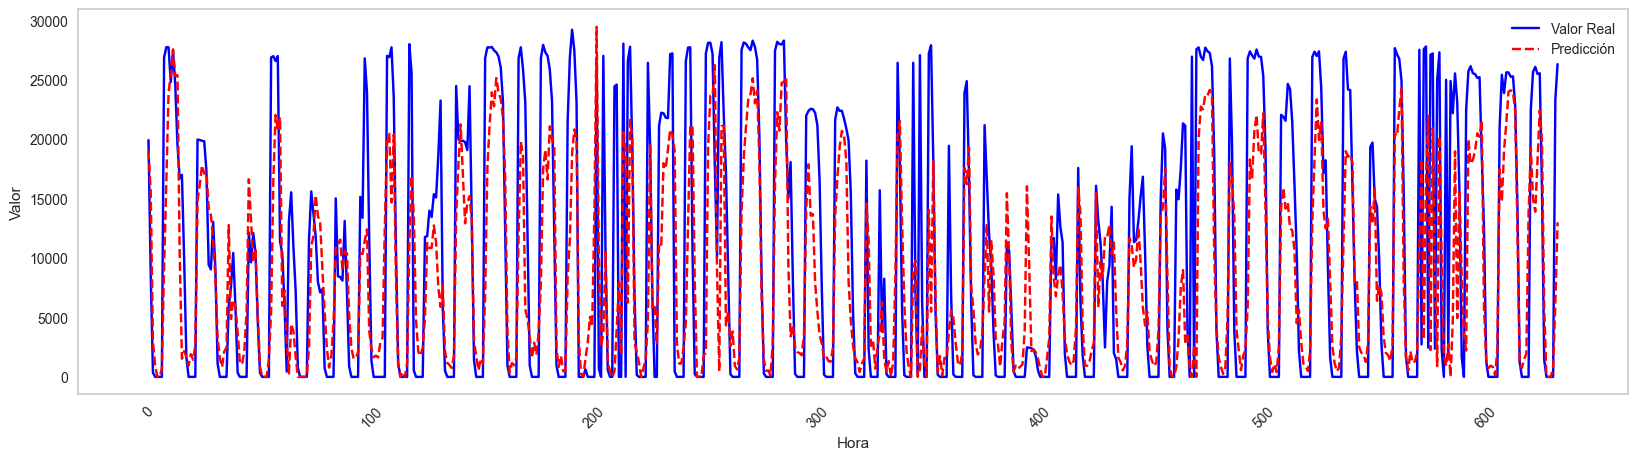

In [66]:
plot_predictions1(model_Nublado, X_Nublado_test, y_Nublado_test, scaler_Nublado_y)

Lluvioso

In [ ]:
scaler_Lluvioso_X = MinMaxScaler()
scaler_Lluvioso_y = MinMaxScaler()

X_Lluvioso_train = scaler_Lluvioso_X.fit_transform(X_Lluvioso_train.reshape(-1, X_Lluvioso_train.shape[-1])).reshape(X_Lluvioso_train.shape)
X_Lluvioso_val = scaler_Lluvioso_X.transform(X_Lluvioso_val.reshape(-1, X_Lluvioso_val.shape[-1])).reshape(X_Lluvioso_val.shape)
X_Lluvioso_test = scaler_Lluvioso_X.transform(X_Lluvioso_test.reshape(-1, X_Lluvioso_test.shape[-1])).reshape(X_Lluvioso_test.shape)

y_Lluvioso_train = scaler_Lluvioso_y.fit_transform(y_Lluvioso_train.reshape(-1, 1)).reshape(-1)
y_Lluvioso_val = scaler_Lluvioso_y.transform(y_Lluvioso_val.reshape(-1, 1)).reshape(-1)
y_Lluvioso_test = scaler_Lluvioso_y.transform(y_Lluvioso_test.reshape(-1, 1)).reshape(-1)


In [37]:
model_Lluvioso = Sequential()
model_Lluvioso.add(InputLayer((WINDOW_SIZE, 9)))

#CNN
model_Lluvioso.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_Lluvioso.add(BatchNormalization())
model_Lluvioso.add(MaxPooling1D(pool_size=2))

#model_Lluvioso.add(Flatten())
#BiLSTM
model_Lluvioso.add(Bidirectional(LSTM(128, return_sequences=True)))
model_Lluvioso.add(Bidirectional(LSTM(64, return_sequences=True)))
model_Lluvioso.add(Dropout(0.2))
model_Lluvioso.add(Bidirectional(LSTM(32, return_sequences=False)))

#Normalizaci√≥n y Dropout
model_Lluvioso.add(BatchNormalization())
model_Lluvioso.add(Dropout(0.3))

model_Lluvioso.add(Dense(16, 'relu'))
model_Lluvioso.add(Dense(1, 'relu'))

model_Lluvioso.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d_1 (Conv1D)               ‚îÇ (None, 10, 64)         ‚îÇ         1,216 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 10, 64)         ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_1 (MaxPooling1D)  ‚îÇ (None, 5, 64)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_3 (Bidirectional) ‚îÇ (None, 5, 256)         ‚îÇ       197,632 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_4 (Bidirectional) ‚îÇ (None, 5, 128)         ‚îÇ       164,352 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 5, 128)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_5 (Bidirectional) ‚îÇ (None, 64)             ‚îÇ        41,216 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ (None, 64)             ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 16)             ‚îÇ         1,040 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 405,985 (1.55 MB)

 Trainable params: 405,729 (1.55 MB)

 Non-trainable params: 256 (1.00 KB)

In [38]:
cp3 = ModelCheckpoint('Forcasting_model_Lluvioso.keras', save_best_only=True)
model_Lluvioso.compile(optimizer=Adam(learning_rate=0.0001), loss=Huber(delta=1000), metrics=['mae'])

In [40]:
X_Lluvioso_train.shape, y_Lluvioso_train.shape, X_Lluvioso_val.shape, y_Lluvioso_val.shape, X_Lluvioso_test.shape, y_Lluvioso_test.shape

((3181, 10, 9), (3181,), (682, 10, 9), (682,), (681, 10, 9), (681,))

In [41]:
history3 = model_Lluvioso.fit(X_Lluvioso_train, y_Lluvioso_train, validation_data=(X_Lluvioso_val, y_Lluvioso_val), epochs=100, batch_size=16, callbacks=[cp3, early_stop])

Epoch 1/100
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 30ms/step - loss: 0.0477 - mae: 0.1424 - val_loss: 0.0306 - val_mae: 0.0938
Epoch 2/100
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 26ms/step - loss: 0.0389 - mae: 0.1188 - val_loss: 0.0306 - val_mae: 0.0938
Epoch 3/100
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 21ms/step - loss: 0.0380 - mae: 0.1165 - val_loss: 0.0304 - val_mae: 0.0940
Epoch 4/100
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 25ms/step - loss: 0.0375 - mae: 0.1162 - val_loss: 0.0306 - val_mae: 0.0938
Epoch 5/100
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 23ms/step - loss: 0.0344 - mae: 0.1067 - val_loss: 0.0288 - val_mae: 0.0911
Epoch 6/100
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 25ms/step - loss: 0.0353 - mae: 0.1097 - val_loss: 0.0304 - val_mae: 0.0935
Epoch 7/100
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

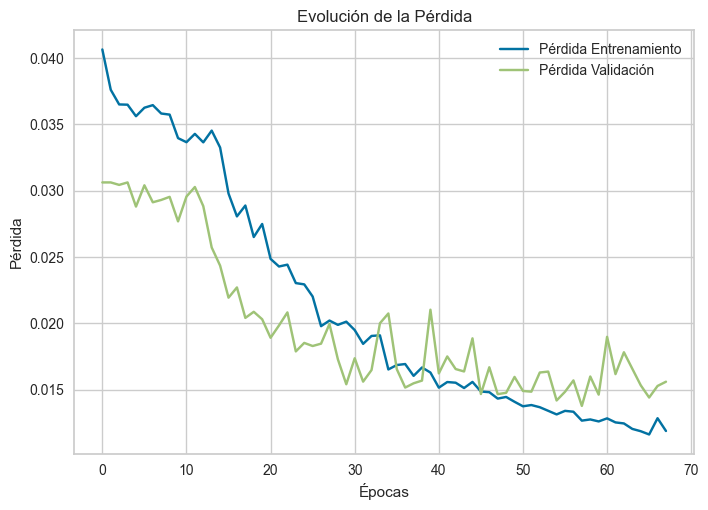

In [42]:
import matplotlib.pyplot as plt

# Extraer la p√©rdida del historial
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Crear la gr√°fica
plt.plot(train_loss, label='P√©rdida Entrenamiento')
plt.plot(val_loss, label='P√©rdida Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.title('Evoluci√≥n de la P√©rdida')
plt.legend()
plt.grid(True)
plt.show()


22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 104ms/step
MAE: 1356.4561
RMSE: 3373.4678
R¬≤: 0.7646


Predictions  Actuals
0       0.000000      0.0
1       0.000000      0.0
2    5824.620117      0.0
3    2228.345703      0.0
4    5839.971680      0.0
..           ...      ...
676     0.000000      0.0
677     0.000000      0.0
678     0.000000      0.0
679     0.000000      0.0
680     0.000000      0.0

[681 rows x 2 columns]

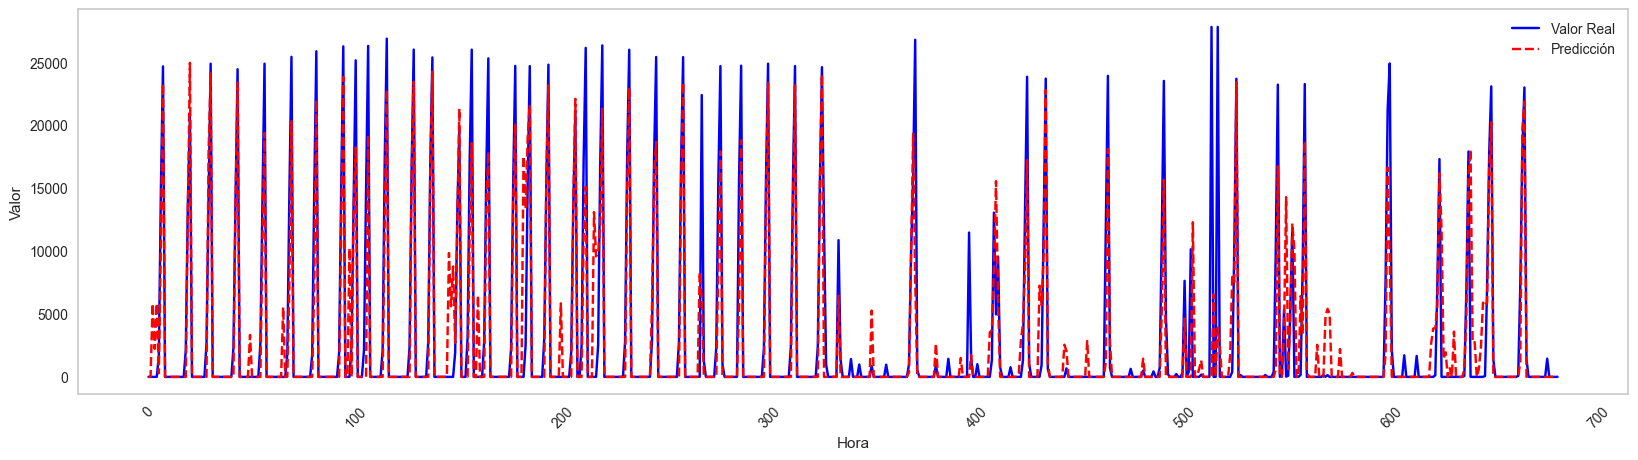

In [43]:
plot_predictions1(model_Lluvioso, X_Lluvioso_test, y_Lluvioso_test, scaler_Lluvioso_y)